<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/Autoencoder_keras_pytorch_code_detail_check_w_shuffle%3DFalse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://deeplizard.com/learn/video/lu7TCu7HeYc

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [2]:
##Keras model

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
test= X_test.reshape(10000*28*4,7)[:200,:]
test_x= X_test.reshape(10000*28*4,7)[:200,:]

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
test.shape, test_x.shape

((200, 7), (200, 7))

In [5]:
input_size = 7
hidden_size = 2
output_size = 7

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)

autoencoder.compile(optimizer="Adam", loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 2)                 16        
                                                                 
 dense_1 (Dense)             (None, 7)                 21        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [6]:
initial_weights = autoencoder.get_weights()
initial_weights

[array([[0.1369, -0.16234],
        [-0.29068, -0.54233],
        [-0.80185, 0.31959],
        [-0.14667, -0.41297],
        [0.78419, -0.055459],
        [-0.77239, 0.067517],
        [0.28439, -0.22734]], dtype=float32),
 array([0, 0], dtype=float32),
 array([[0.23004, 0.11316, -0.13335, -0.078073, 0.043858, 0.74084, -0.77655],
        [0.16993, -0.43666, -0.60856, 0.49987, 0.69798, 0.75596, -0.65672]], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 0], dtype=float32)]

In [7]:
autoencoder.set_weights(
    [np.array([[0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3]]),
 np.array([0.3, 0.3]),
 np.array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]),
 np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])]
)

In [8]:
initial_weights = autoencoder.get_weights()
initial_weights

[array([[0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3],
        [0.3, 0.3]], dtype=float32),
 array([0.3, 0.3], dtype=float32),
 array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]], dtype=float32),
 array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], dtype=float32)]

In [9]:
epochs = 10
batch_size = test.shape[0]
# batch_size = int(test.shape[0]/2)
batch_size = int(test.shape[0]/4)
# batch_size = int(test.shape[0]/8)

history = autoencoder.fit(test, test, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_x, test_x), shuffle=False)

Epoch 1/10
4/4 [==============================] - 1s 58ms/step - loss: 0.3430 - val_loss: 0.3415
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3406 - val_loss: 0.3390
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 0.3381 - val_loss: 0.3366
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 0.3357 - val_loss: 0.3342
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.3333 - val_loss: 0.3318
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.3310 - val_loss: 0.3295
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.3287 - val_loss: 0.3272
Epoch 8/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3264 - val_loss: 0.3250
Epoch 9/10
4/4 [==============================] - 0s 11ms/step - loss: 0.3242 - val_loss: 0.3228
Epoch 10/10
4/4 [==============================] - 0s 12ms/step - loss: 0.3220 - val_loss: 0.3206


In [10]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [11]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, num_workers=1, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_x, batch_size=batch_size, num_workers=1, shuffle=False)

In [12]:
# train_loader.dataset

In [13]:
# train_loader.batch_size

In [14]:
# Model definition
class FullyConnectedAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        # Encoder: affine function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Decoder: affine function
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Encoder: affine function
        out = self.fc1(x)
        # Encoder: non-linear function
        # out = F.leaky_relu(out)
        out = F.relu(out)

        # Decoder: affine function
        out = self.fc2(out)
        # Decoder: non-linear function
        out = torch.sigmoid(out)

        return out

In [15]:
# Dimensions for overcomplete (larger latent representation)
input_dim = 7
hidden_dim = int(2)
output_dim = 7

# Instantiate Fully-connected Autoencoder (FC-AE)
# And assign to model object
model = FullyConnectedAutoencoder(input_dim, hidden_dim, output_dim)
print(model)

FullyConnectedAutoencoder(
  (fc1): Linear(in_features=7, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=7, bias=True)
)


In [16]:
criterion = nn.MSELoss()
# Using basic Adam optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [17]:
num_epochs=epochs

for p in model.parameters():
  p.data.fill_(0.3)

print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000]])), ('fc1.bias', tensor([0.3000, 0.3000])), ('fc2.weight', tensor([[0.3000, 0.3000],
        [0.3000, 0.3000],
        [0.3000, 0.3000],
        [0.3000, 0.3000],
        [0.3000, 0.3000],
        [0.3000, 0.3000],
        [0.3000, 0.3000]])), ('fc2.bias', tensor([0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000]))])


In [18]:
# dir(model)

In [19]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()

    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer

losses = []
loss_fn = nn.MSELoss(reduction='mean')
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
train_step = make_train_step(model, loss_fn, optimizer)

In [20]:
# prepare data loaders
# train_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, num_workers=1)
# test_loader = torch.utils.data.DataLoader(test_x, batch_size=batch_size, num_workers=1)

In [21]:
# Training loop
for epoch in range(num_epochs):
    # Uses loader to fetch one mini-batch for training
    for x_batch in train_loader:

        x_batch1 = x_batch.to('cpu')
        x_batch2 = x_batch.to('cpu')
        # One stpe of training
        loss = train_step(x_batch1, x_batch2)
        losses.append(loss)


In [22]:
print('pytorch model')
print(model.state_dict())

pytorch model
OrderedDict([('fc1.weight', tensor([[0.2616, 0.2657, 0.2656, 0.2659, 0.2660, 0.2631, 0.2625],
        [0.2616, 0.2657, 0.2656, 0.2659, 0.2660, 0.2631, 0.2625]])), ('fc1.bias', tensor([0.2609, 0.2609])), ('fc2.weight', tensor([[0.2608, 0.2608],
        [0.2613, 0.2613],
        [0.2614, 0.2614],
        [0.2611, 0.2611],
        [0.2610, 0.2610],
        [0.2610, 0.2610],
        [0.2610, 0.2610]])), ('fc2.bias', tensor([0.2602, 0.2604, 0.2604, 0.2604, 0.2603, 0.2602, 0.2601]))])


In [23]:
print('keras model')
autoencoder.get_weights()

keras model


[array([[0.2616, 0.2616],
        [0.26568, 0.26568],
        [0.2656, 0.2656],
        [0.26594, 0.26594],
        [0.26597, 0.26597],
        [0.26307, 0.26307],
        [0.26251, 0.26251]], dtype=float32),
 array([0.26085, 0.26085], dtype=float32),
 array([[0.26083, 0.26132, 0.26143, 0.26114, 0.26105, 0.26096, 0.261],
        [0.26083, 0.26132, 0.26143, 0.26114, 0.26105, 0.26096, 0.261]], dtype=float32),
 array([0.26015, 0.26044, 0.26042, 0.26038, 0.26034, 0.26023, 0.26015], dtype=float32)]

In [24]:
# loss_avg=np.array(losses).reshape(num_epochs, int(test.shape[0]/batch_size)).mean(axis=1)
# loss_avg
# history.history.get('loss')

In [25]:
loss_avg=np.array(losses).reshape(num_epochs, int(test.shape[0]/batch_size)).mean(axis=1)
df_loss=pd.DataFrame(np.c_[history.history.get('loss'), loss_avg], columns=['keras_loss','pytorch_loss'])
df_loss

,keras_loss,pytorch_loss
0,0.343034,0.343034
1,0.340556,0.340556
2,0.338111,0.338111
3,0.335699,0.335698
4,0.333321,0.333320
5,0.330979,0.330978
6,0.328674,0.328673
7,0.326408,0.326407
8,0.324180,0.324179
9,0.321992,0.321991


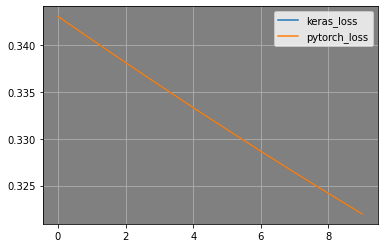

In [26]:
P=df_loss.plot()
P.set_facecolor('grey') 
plt.grid()

In [27]:
# for i in range(len(initial_weights)):
#     # print(initial_weights[i].shape)
#     print(i, '\t', initial_weights[i])

In [28]:
# import tensorflow
# model_cloned = tensorflow.keras.models.clone_model(autoencoder)
# print("Original weights", initial_weights[0])
# print("========================================================")
# print("========================================================")
# print("========================================================")
# # model_cloned = tensorflow.keras.models.clone_model(model_base)
# new_weights = model_cloned.get_weights()
# print("New weights", new_weights[0])

In [29]:
# for ix, layer in enumerate(autoencoder.layers):
#     if hasattr(autoencoder.layers[ix], 'kernel_initializer') and \
#             hasattr(autoencoder.layers[ix], 'bias_initializer'):
#         weight_initializer = autoencoder.layers[ix].kernel_initializer
#         bias_initializer = autoencoder.layers[ix].bias_initializer

#         old_weights, old_biases = autoencoder.layers[ix].get_weights()

#         autoencoder.layers[ix].set_weights([
#             weight_initializer(shape=old_weights.shape),
#             bias_initializer(shape=old_biases.shape)]) 
